# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

In [255]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Dataset

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [3]:
df.shape

(373, 15)

In [4]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [5]:
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [6]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# Null values

In [7]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

# Duplicate values

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
368    False
369    False
370    False
371    False
372    False
Length: 373, dtype: bool

In [9]:
sum(df.duplicated())

0

# Fill Null values

In [10]:
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

In [12]:
df["SES"].isnull().sum()

0

In [14]:
df["MMSE"].isnull().sum()

0

# Plot Demented vs Non Demented vs Converted

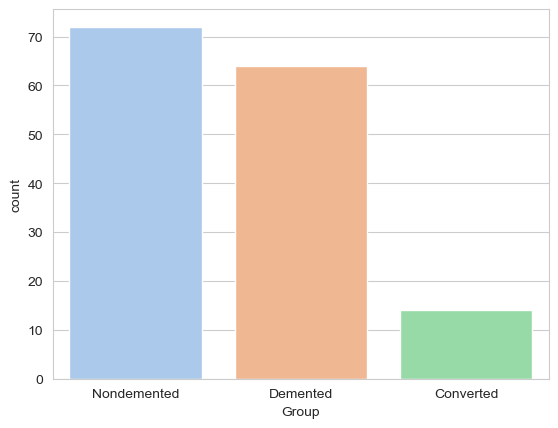

In [15]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)
plt.show()

# Make Coverted as Demented

<Axes: xlabel='Group', ylabel='count'>

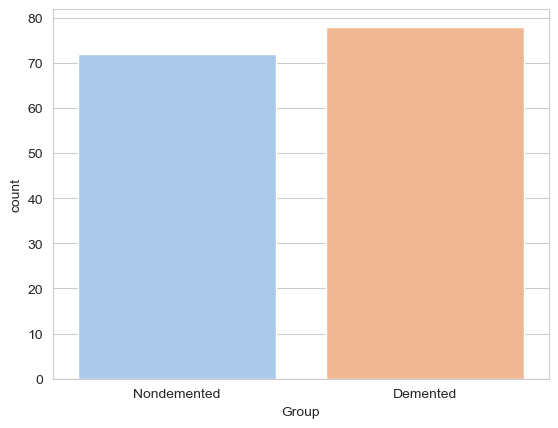

In [18]:
ex_df.loc[ex_df['Group'] == 'Converted', 'Group'] = 'Demented'
df.loc[df['Group'] == 'Converted', 'Group'] = 'Demented'
sns.countplot(x='Group', data=ex_df)

In [19]:
df['Group']

0      Nondemented
1      Nondemented
2         Demented
3         Demented
4         Demented
          ...     
368       Demented
369       Demented
370    Nondemented
371    Nondemented
372    Nondemented
Name: Group, Length: 373, dtype: object

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(50.0, 100.0)

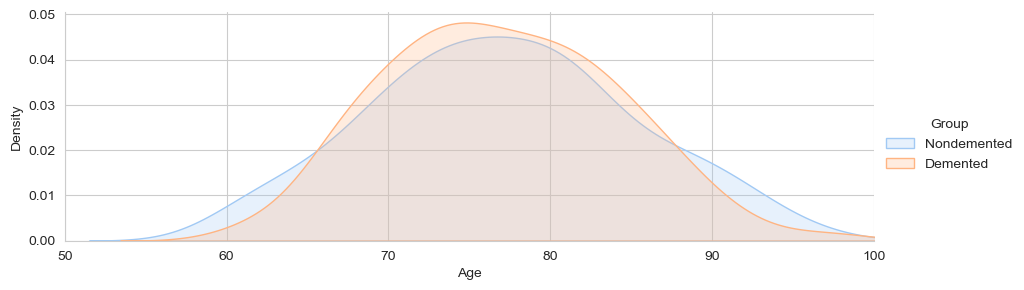

In [20]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


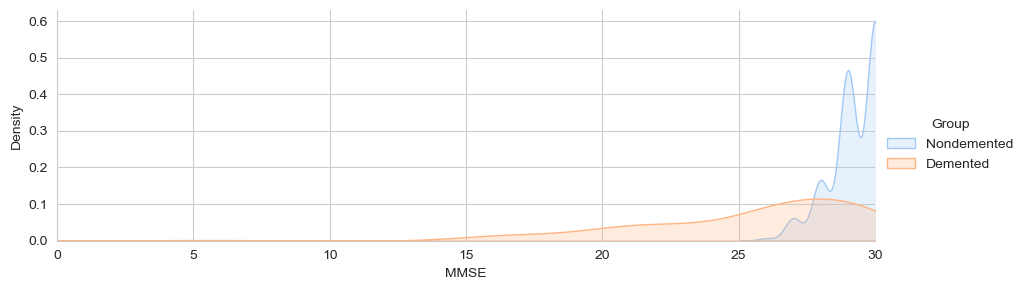

In [25]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',fill= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


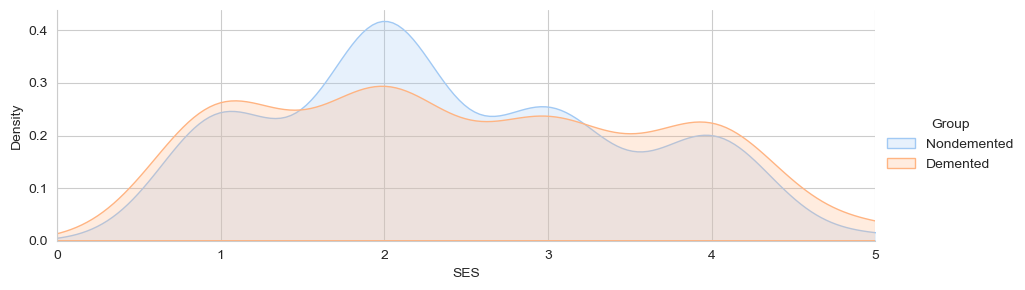

In [24]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'SES',fill= True)
facet.set(xlim=(0, df['SES'].max()))
facet.add_legend()

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


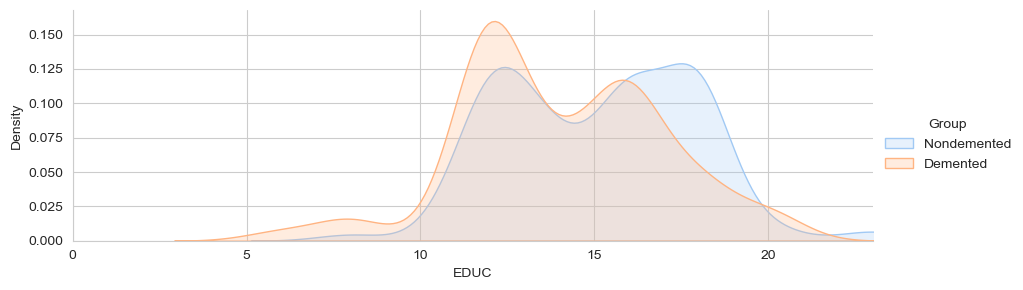

In [26]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',fill= True)
facet.set(xlim=(0, df['EDUC'].max()))
facet.add_legend()

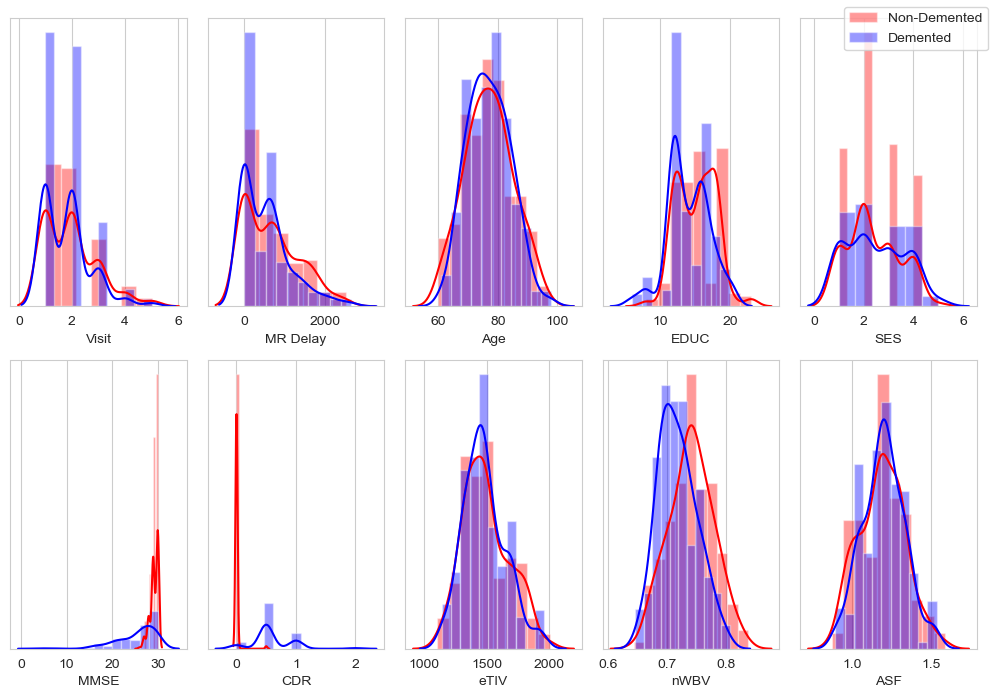

In [30]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,5,figsize=(10,7))

for idx,col in enumerate(df.select_dtypes(include=['float64','int64'])):
    sns.distplot(df[df["Group"]=='Nondemented'][col],label='Non-Demented',color='red',ax=axes[idx//5,idx%5])
    sns.distplot(df[df["Group"]=='Demented'][col],label='Demented',color='blue',ax=axes[idx//5,idx%5])
    axes[idx//5,idx%5].set_yticks([])
    axes[idx//5,idx%5].set_ylabel('')
fig.tight_layout()
fig.legend(labels=['Non-Demented',"_",'Demented',"_"])
fig.show()

<Figure size 400x400 with 0 Axes>

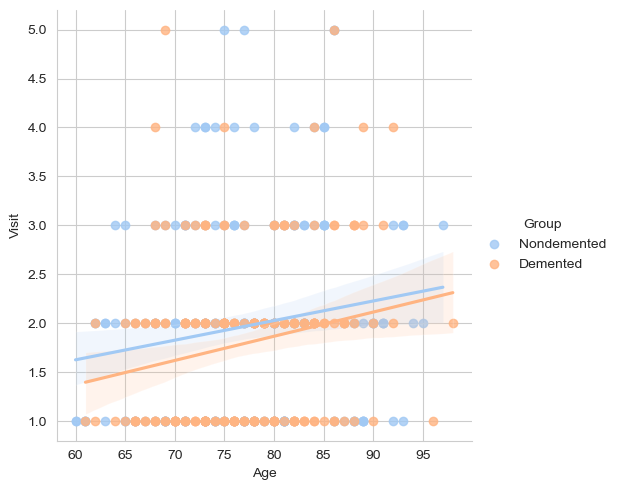

<Figure size 400x400 with 0 Axes>

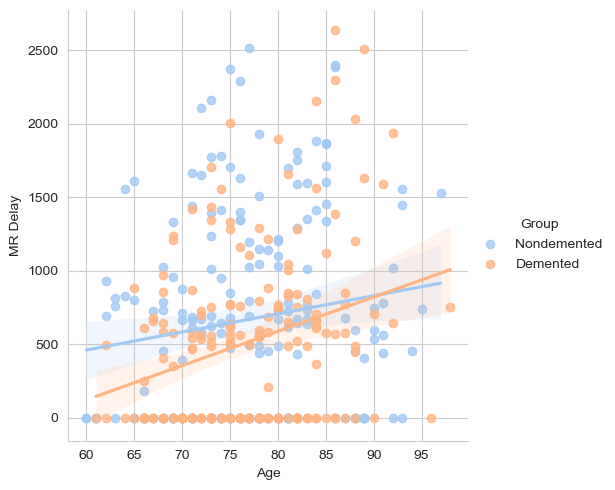

<Figure size 400x400 with 0 Axes>

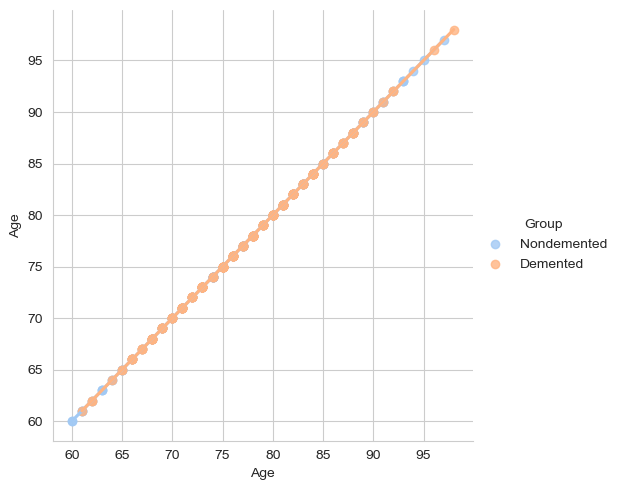

<Figure size 400x400 with 0 Axes>

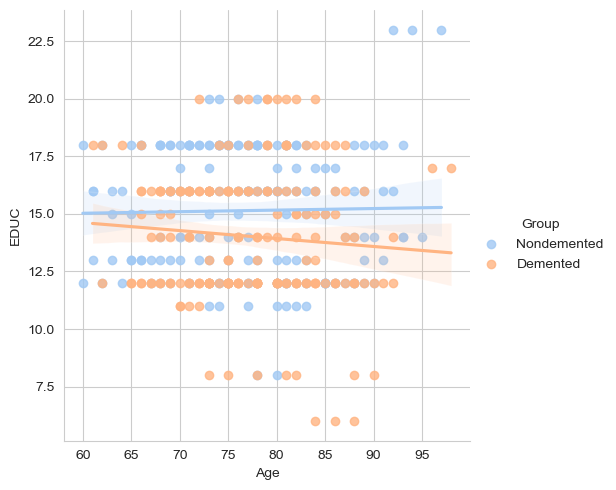

<Figure size 400x400 with 0 Axes>

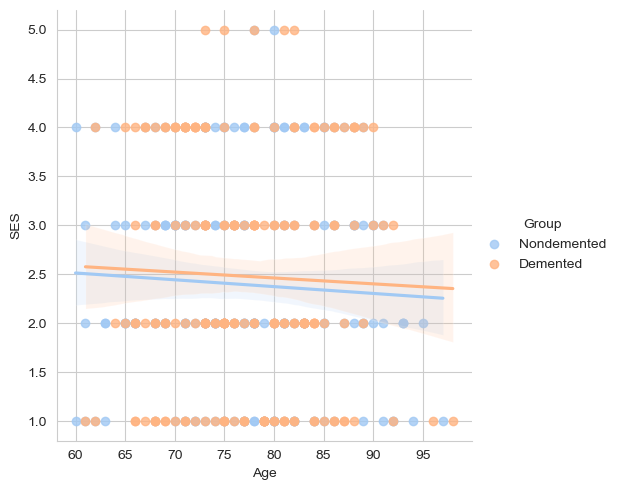

<Figure size 400x400 with 0 Axes>

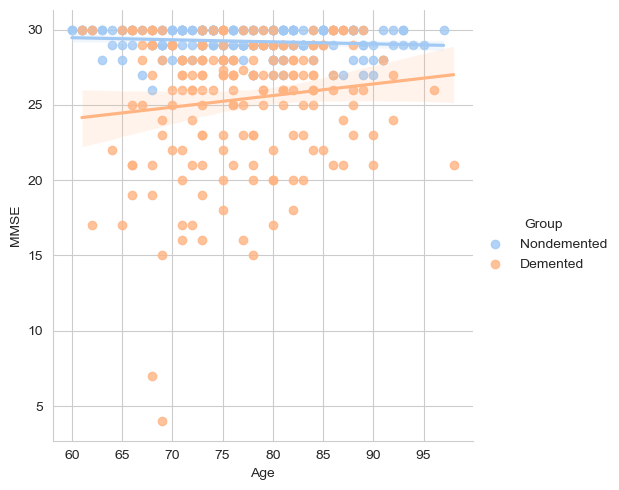

<Figure size 400x400 with 0 Axes>

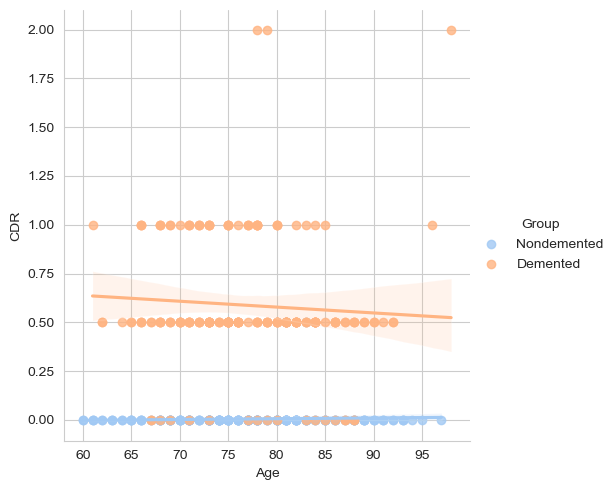

<Figure size 400x400 with 0 Axes>

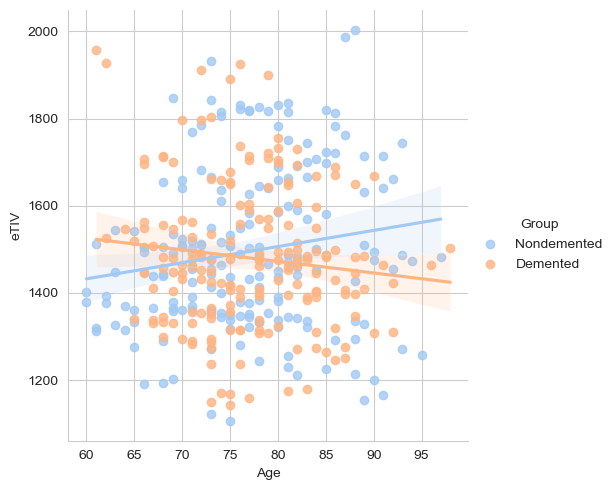

<Figure size 400x400 with 0 Axes>

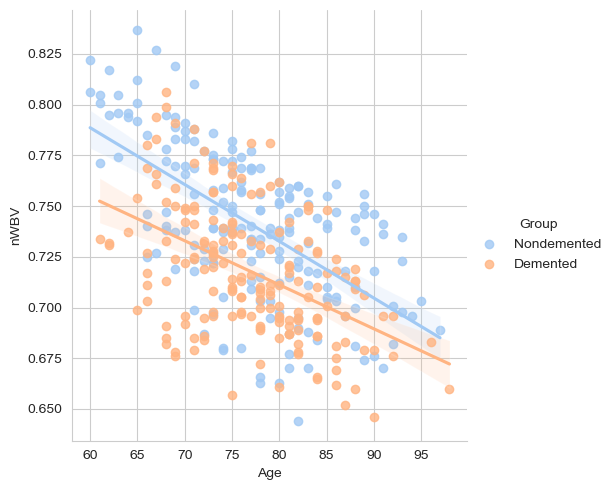

<Figure size 400x400 with 0 Axes>

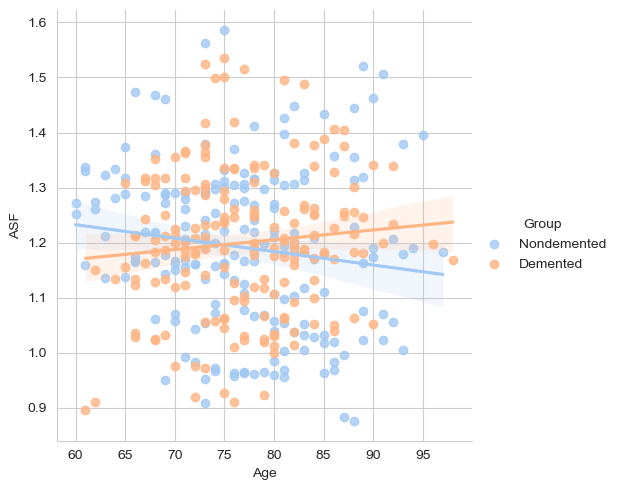

In [31]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.lmplot(x='Age', y=col, hue='Group', data=df)

In [65]:
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [67]:
cor_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
cor_df = df[cor_cols]
corr = cor_df.corr().round(2)
corr

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
M/F,1.00,-0.04,0.09,-0.05,-0.17,0.21,0.56,-0.26,-0.56
Age,-0.04,1.00,-0.03,-0.05,0.04,-0.04,0.04,-0.51,-0.04
EDUC,0.09,-0.03,1.00,-0.69,0.22,-0.17,0.24,-0.02,-0.24
SES,-0.05,-0.05,-0.69,1.00,-0.17,0.06,-0.24,0.09,0.24
MMSE,-0.17,0.04,0.22,-0.17,1.00,-0.72,-0.04,0.35,0.04
CDR,0.21,-0.04,-0.17,0.06,-0.72,1.00,0.03,-0.36,-0.03
eTIV,0.56,0.04,0.24,-0.24,-0.04,0.03,1.00,-0.21,-1.00
nWBV,-0.26,-0.51,-0.02,0.09,0.35,-0.36,-0.21,1.00,0.21
ASF,-0.56,-0.04,-0.24,0.24,0.04,-0.03,-1.00,0.21,1.00


<Axes: >

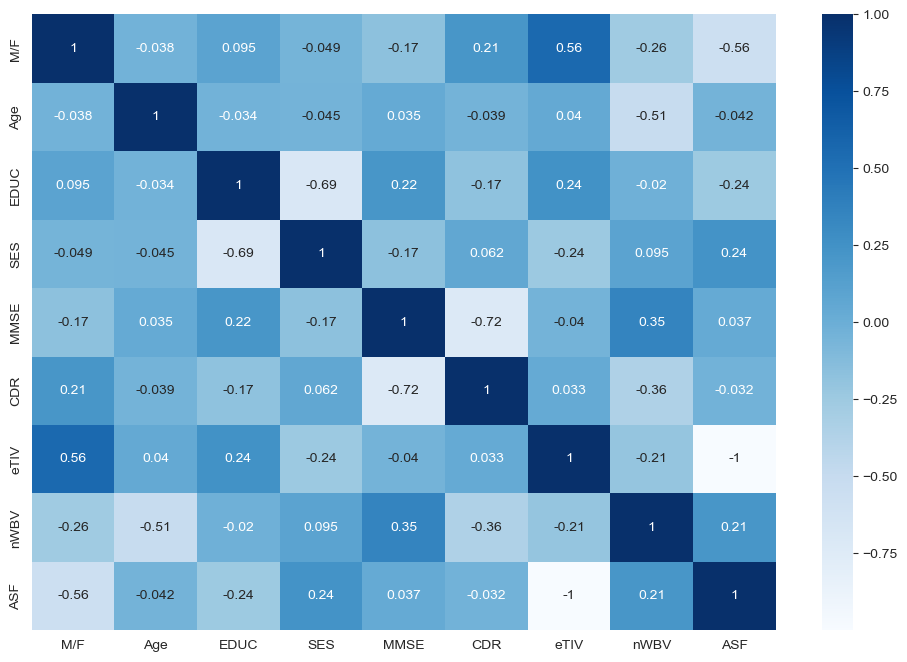

In [70]:
corr = cor_df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues')

# Get outliers

In [32]:
def outliers_iqr(arr):
    quartile_1, quartile_3 = np.percentile(arr, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((arr > upper_bound) | (arr < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369], dtype=int64),)
EDUC :  (array([107, 108, 109], dtype=int64),)
SES :  (array([136, 137, 138, 161, 162, 179, 180], dtype=int64),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366], dtype=int64),)
eTIV :  (array([0, 1], dtype=int64),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282], dtype=int64),)


# Replacing Categorial values with numeric values 

In [33]:
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [34]:
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,2.0,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,0,1,0,0,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,0,2,538,0,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,0,1,0,1,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,0,2,1010,1,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,0,3,1603,1,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [35]:
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [36]:
df.head(30)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,0,1,0,27,5,1,14,0,284,35,1
1,0,1,0,1,15,1,0,28,5,1,18,0,285,20,0
2,1,2,1,0,0,1,0,15,3,1,10,1,231,73,52
3,1,3,1,1,32,1,0,16,3,1,16,1,254,51,32
4,1,4,1,2,185,1,0,20,3,1,9,1,238,40,46
5,2,5,0,0,0,0,0,28,9,2,16,0,16,48,248
6,2,6,0,1,27,0,0,30,9,2,14,0,13,56,251
7,3,7,0,0,0,1,0,20,3,3,16,0,234,50,49
8,3,8,0,1,119,1,0,23,3,3,17,1,240,49,44
9,3,9,0,2,168,1,0,25,3,3,18,0,239,43,45


# Selecting features and splitting dataset

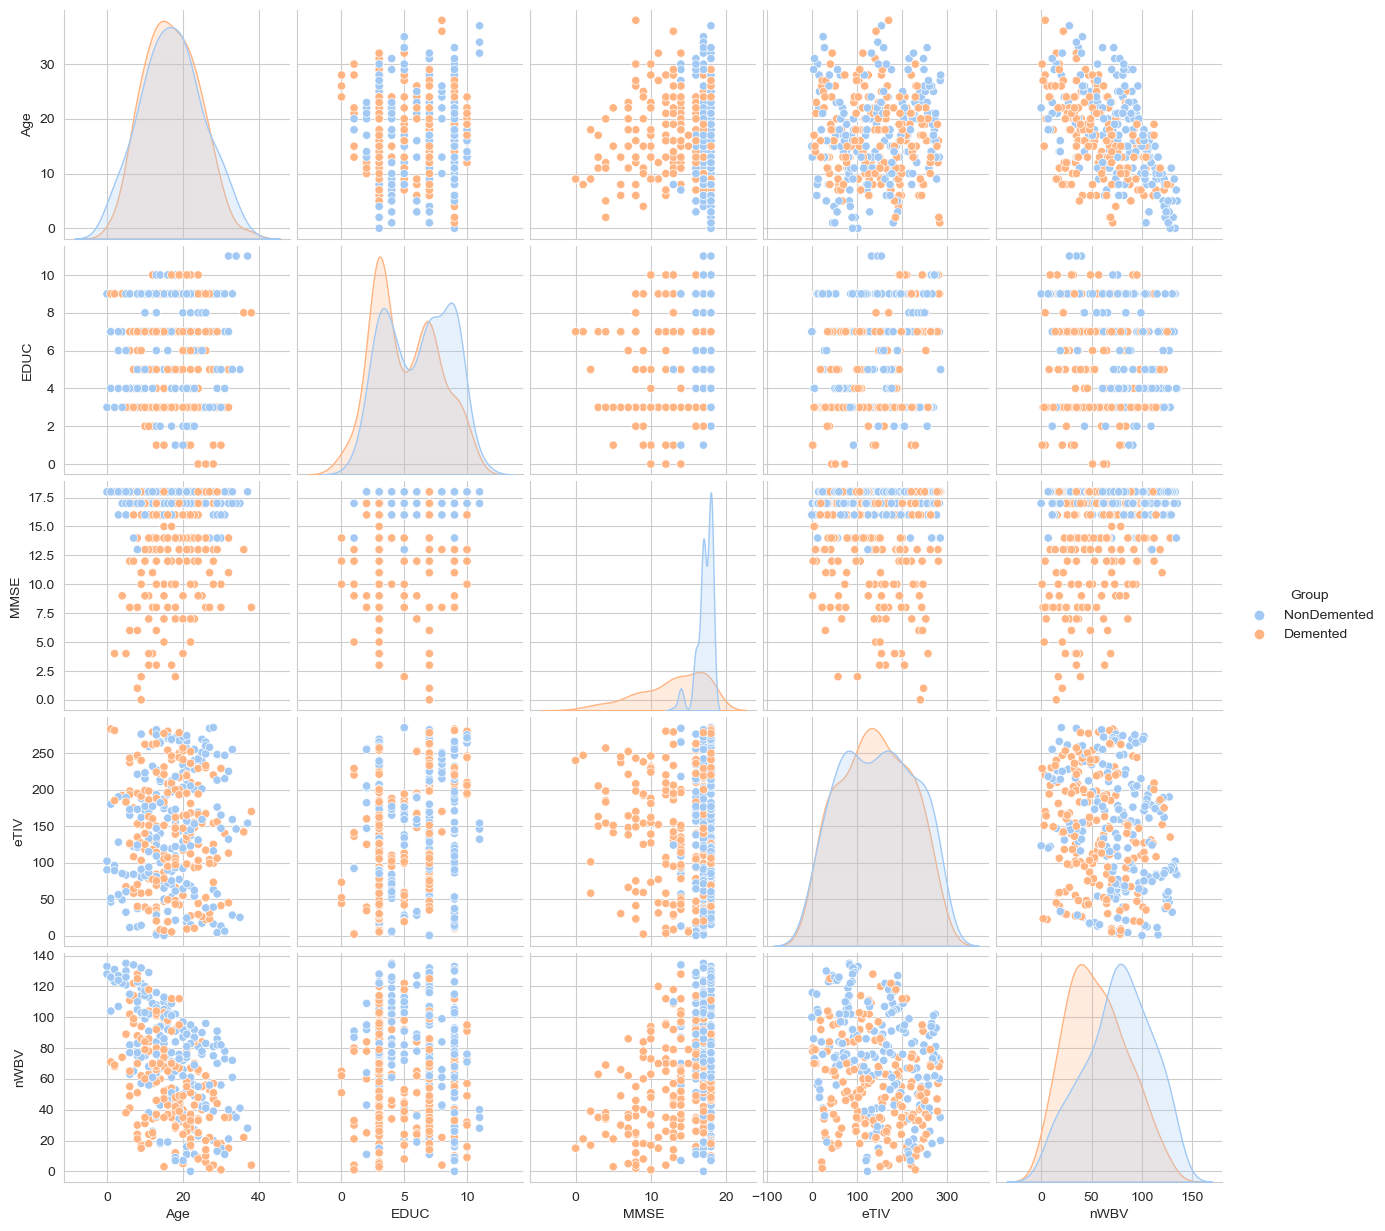

In [37]:
cols = ['Group','Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV']
df_encoded = df.copy()
df_encoded['Group'] = df_encoded['Group'].replace({0: 'NonDemented', 1: 'Demented'})
sns.pairplot(df_encoded[cols], hue="Group",palette="pastel")

In [109]:
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_name = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_name].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)

In [110]:
print(len(X_train))
print(len(X_test))

261
112


In [112]:
from imblearn.over_sampling import SMOTE

print ('Number of observations in the Group before oversampling of the minority class in trainset:', np.bincount (y_train.ravel()) )
smt = SMOTE ()
X_train, y_train = smt.fit_resample (X_train, y_train)
print ('\nNumber of observations in the Group after oversampling of the minority class in trainset:', np.bincount (y_train.ravel()) )

print ('Number of observations in the Group before oversampling of the minority class in testset:', np.bincount (y_test.ravel()) )
smtest = SMOTE ()
X_test, y_test = smtest.fit_resample (X_test, y_test)
print ('\nNumber of observations in the Group after oversampling of the minority class in testset:', np.bincount (y_test) )

Number of observations in the Group before oversampling of the minority class in trainset: [133 128]

Number of observations in the Group after oversampling of the minority class in trainset: [133 133]
Number of observations in the Group before oversampling of the minority class in testset: [57 55]

Number of observations in the Group after oversampling of the minority class in testset: [57 57]


In [113]:
print(len(X_train))
print(len(X_test))

266
114


In [114]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X = std_scaler.fit_transform ( X )
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

# Hyper-Parameter Tuning

In [123]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svc', SVC()) 
])
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.1, 1, 10],
    'svc__kernel': ['linear', 'poly', 'rbf']
}


In [124]:
y = np.ravel(y)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
Best Score: 0.7905945945945947


# Training model with best parameters

In [125]:
svm = SVC(kernel='linear',gamma = 0.1, C = 100)
svm.fit(X_train_std,y_train)

SVC(C=100, gamma=0.1, kernel='linear')

# Training accuracy

In [126]:
accuracy_train = svm.score(X_train_std, y_train)
print("Accuracy on the Train Set:", accuracy_train)

Accuracy on the Train Set: 0.7857142857142857


# Testing accuracy

In [127]:
accuracy_test = svm.score(X_test_std, y_test)
print("Accuracy on the Test Set:", accuracy_test)

Accuracy on the Test Set: 0.8245614035087719


In [128]:
y_pred = svm.predict(X_test_std)

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.8245614035087719
Percentage :  82 %


In [178]:
def report_performance(model):

    model_test = model.predict(X_test_best)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test_best, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test_best, model_test))
    plot_confusion_metrix(y_test_best, model_test)

In [179]:
def plot_confusion_metrix(y_test_best,model_test):
    cm = metrics.confusion_matrix(y_test_best, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, alpha=0.7)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [182]:
from sklearn.metrics import RocCurveDisplay
def plotroccurve(model):
    RocCurveDisplay.from_predictions(
        y_test_best,
        y_pred,
        name=f"ROC",
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()

# K-fold cross validation

In [162]:
kf = KFold(n_splits=5, shuffle=True, random_state=2020)

In [163]:
cv_scores = []
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    svm.fit(X_train_fold, y_train_fold)
    
    score = svm.score(X_test_fold, y_test_fold)
    cv_scores.append(score)
print(cv_scores)

[0.88, 0.76, 0.8266666666666667, 0.7027027027027027, 0.8243243243243243]


In [164]:
best_fold_index = cv_scores.index(max(cv_scores))
best_fold_index

0

# Training model according to best fold

In [165]:
best_fold_index = cv_scores.index(max(cv_scores))
train_index, test_index = list(kf.split(X))[best_fold_index]

X_train_best, X_test_best = X[train_index], X[test_index]
y_train_best, y_test_best = y[train_index], y[test_index]

svm.fit(X_train_best, y_train_best.ravel())

SVC(C=100, gamma=0.1, kernel='linear')

In [166]:
print(len(X_train_best))
print(len(X_test_best))

298
75


In [167]:
accuracy_test = svm.score(X_train_best, y_train_best)
print("Accuracy on the Train Set:", accuracy_test)

Accuracy on the Train Set: 0.785234899328859


In [168]:
accuracy_test = svm.score(X_test_best, y_test_best)
print("Accuracy on the Test Set:", accuracy_test)

Accuracy on the Test Set: 0.88


In [174]:
y_pred = svm.predict(X_test_best)

In [175]:
accuracy = accuracy_score(y_test_best, y_pred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  0.88
Percentage :  88 %


# Model accuracy

In [176]:
pred = svm.predict(X_test_best)
accu = metrics.accuracy_score(y_test_best,pred)
y_test_best  = y_test_best.ravel()
results_df = pd.DataFrame({'Predicted': pred, 'Actual': y_test_best})
    
print("\nAcuuracy Of the Model: ",accu,"\n\n")
print("Predicted vs Actual:\n")
print(results_df)


Acuuracy Of the Model:  0.88 


Predicted vs Actual:

    Predicted  Actual
0           0       0
1           0       0
2           1       1
3           0       1
4           0       0
..        ...     ...
70          0       0
71          1       1
72          0       0
73          1       1
74          0       0

[75 rows x 2 columns]


# Confusion matrix



Confusion Matrix:
[[38  1]
 [ 8 28]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        39
           1       0.97      0.78      0.86        36

    accuracy                           0.88        75
   macro avg       0.90      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



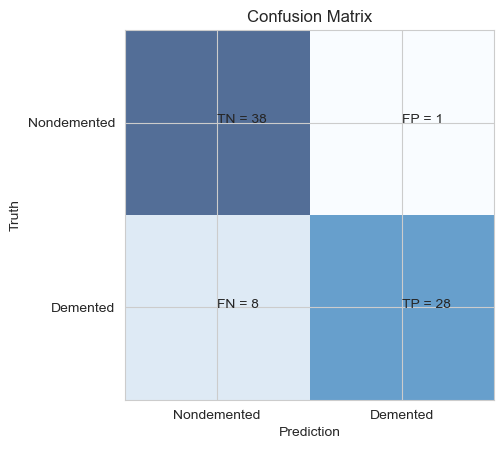

In [183]:
report_performance(svm) 

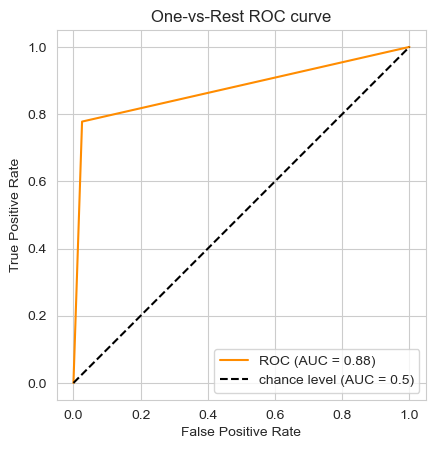

In [184]:
plotroccurve(svm)

# Decision Tree Classifier

In [185]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', DecisionTreeClassifier())  
])
param_grid = {"clf__criterion": ["gini", "entropy"],
              "clf__min_samples_split": [10, 20],
              "clf__max_depth": [3, 5, 10, 20],
              "clf__min_samples_leaf": [30, 100, 300],
              "clf__max_leaf_nodes": [None,2,3,5],
              }

In [231]:
dtclassifier = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
dtclassifier.fit(X_train_std, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [3, 5, 10, 20],
                         'clf__max_leaf_nodes': [None, 2, 3, 5],
                         'clf__min_samples_leaf': [30, 100, 300],
                         'clf__min_samples_split': [10, 20]},
             scoring='accuracy')

In [232]:
dtclassifier.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 3,
 'clf__max_leaf_nodes': None,
 'clf__min_samples_leaf': 100,
 'clf__min_samples_split': 10}

# DT with Grid Search 

In [233]:
maxdepth= dtclassifier.best_params_.get('clf__max_depth')
min_samplesleaf= dtclassifier.best_params_.get('clf__min_samples_leaf')
min_samplessplit= dtclassifier.best_params_.get('clf__min_samples_split')
criterion_used=dtclassifier.best_params_.get('clf__criterion')

In [245]:
dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=min_samplesleaf, min_samples_split=min_samplessplit, criterion= criterion_used)

In [246]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=10)

# Accuracy

In [247]:
y_pred = dtree.predict(X_test)
print(dtree.score(X_train,y_train))
print(dtree.score(X_test,y_test))
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

0.7706766917293233
0.7982456140350878
Accuracy:  0.7982456140350878


# K-Fold Cross Validation

In [240]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2022)

In [248]:
cv_scores_dt = []
for train_index, test_index in kfold.split(X):
    X_train_fold_dt, X_test_fold_dt = X[train_index], X[test_index]
    y_train_fold_dt, y_test_fold_dt = y[train_index], y[test_index]
    
    dtree.fit(X_train_fold_dt, y_train_fold_dt.ravel())
    
    score = dtree.score(X_test_fold_dt, y_test_fold_dt)
    cv_scores_dt.append(score)
print(cv_scores_dt)

[0.8, 0.76, 0.72, 0.8783783783783784, 0.7297297297297297]


In [249]:
best_fold_index = cv_scores_dt.index(max(cv_scores_dt))
best_fold_index

3

# Training according to best split

In [250]:
best_fold_index = cv_scores_dt.index(max(cv_scores_dt))
train_index, test_index = list(kfold.split(X))[best_fold_index]

X_train_best, X_test_best = X[train_index], X[test_index]
y_train_best, y_test_best = y[train_index], y[test_index]
dtree.fit(X_train_best, y_train_best.ravel())

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=10)

In [251]:
print(len(X_train_best))
print(len(X_test_best))

299
74


[Text(0.5, 0.75, 'x[4] <= 0.376\ngini = 0.5\nsamples = 299\nvalue = [147, 152]'),
 Text(0.25, 0.25, 'gini = 0.345\nsamples = 140\nvalue = [31, 109]'),
 Text(0.75, 0.25, 'gini = 0.395\nsamples = 159\nvalue = [116.0, 43.0]')]

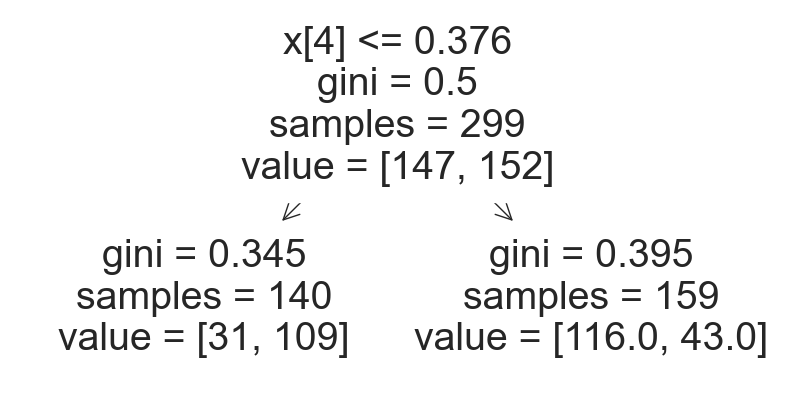

In [252]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plot_tree(dtree)

# Training accuracy

In [253]:
accuracy_test = dtree.score(X_train_best, y_train_best)
print("Accuracy on the Train Set:", accuracy_test)

Accuracy on the Train Set: 0.7525083612040134


# Testing accuracy

In [254]:
accuracy_test = dtree.score(X_test_best, y_test_best)
print("Accuracy on the Train Set:", accuracy_test)

Accuracy on the Train Set: 0.8783783783783784


# Evaluation

In [214]:
y_pred = dtree.predict(X_test_best)
accuracy = metrics.accuracy_score(y_test_best,y_pred)
y_test_best  = y_test_best.ravel()
results_df_ = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test_best})
    
print("\nAcuuracy Of the Model: ",accuracy,"\n\n")
print("Predicted vs Actual:\n")
print(results_df_)


Acuuracy Of the Model:  0.8783783783783784 


Predicted vs Actual:

    Predicted  Actual
0           1       0
1           0       0
2           1       1
3           0       0
4           0       0
..        ...     ...
69          1       1
70          0       0
71          1       1
72          1       1
73          0       0

[74 rows x 2 columns]




Confusion Matrix:
[[40  3]
 [ 6 25]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.89      0.81      0.85        31

    accuracy                           0.88        74
   macro avg       0.88      0.87      0.87        74
weighted avg       0.88      0.88      0.88        74



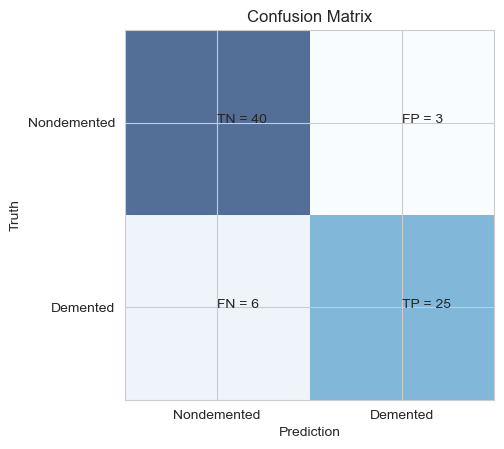

In [215]:
report_performance(dtree) 

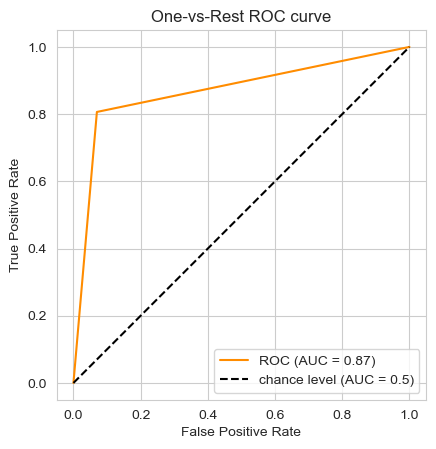

In [216]:
plotroccurve(dtree)